In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import LabelEncoder

In [28]:
df=pd.read_csv('/content/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [29]:
df['reservation_status_date'].head()

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

from here we can see that we have some missing value at childern,country,agent, company

In [31]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


from hear we can see that in avg 37% of the bookings is cancelled , 92% of the booking stays in the weekend nights also in average people book by a lead time of 104 days  with minimum arriving in the same day

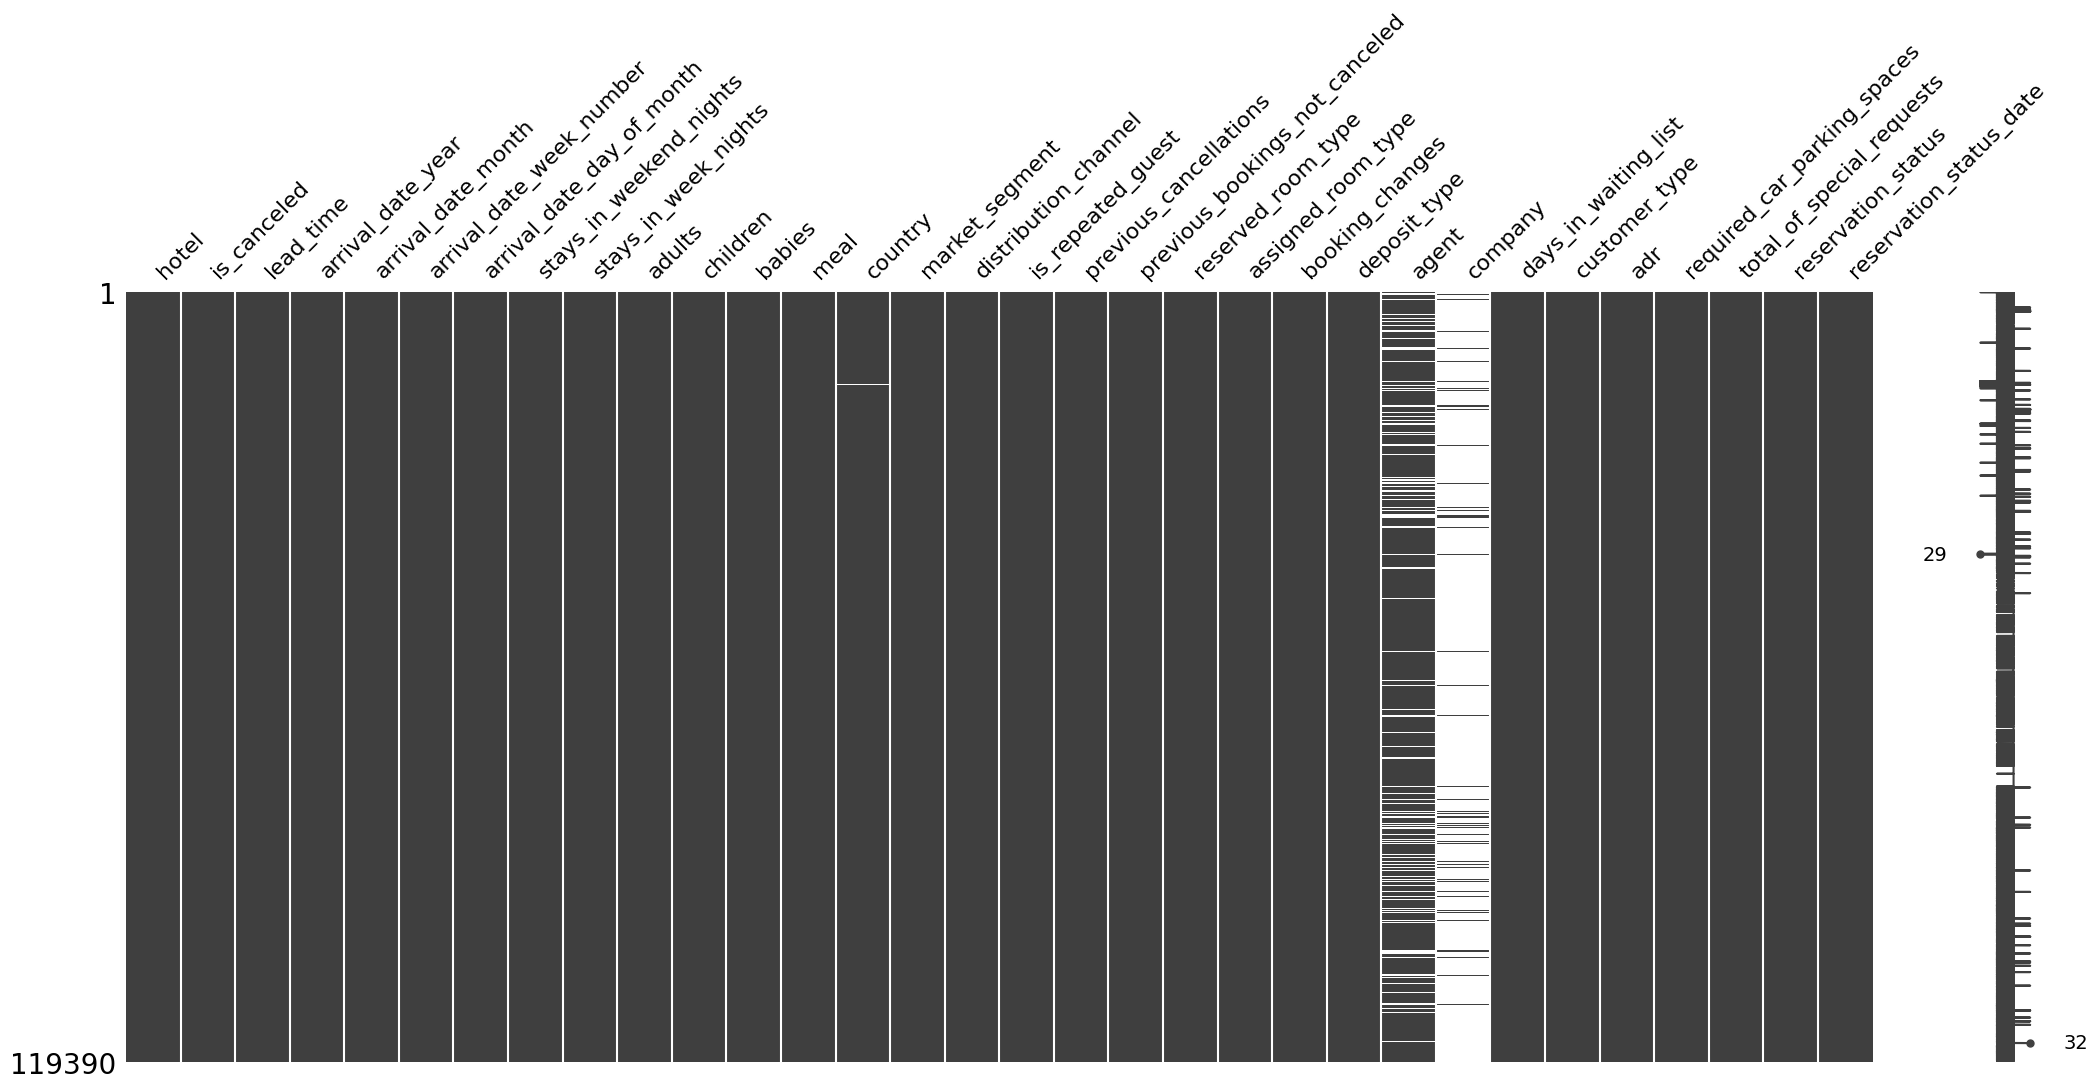

In [32]:
msno.matrix(df)
plt.show()

we can see clearly from this matrix that there is a lot of missings in agent and companies


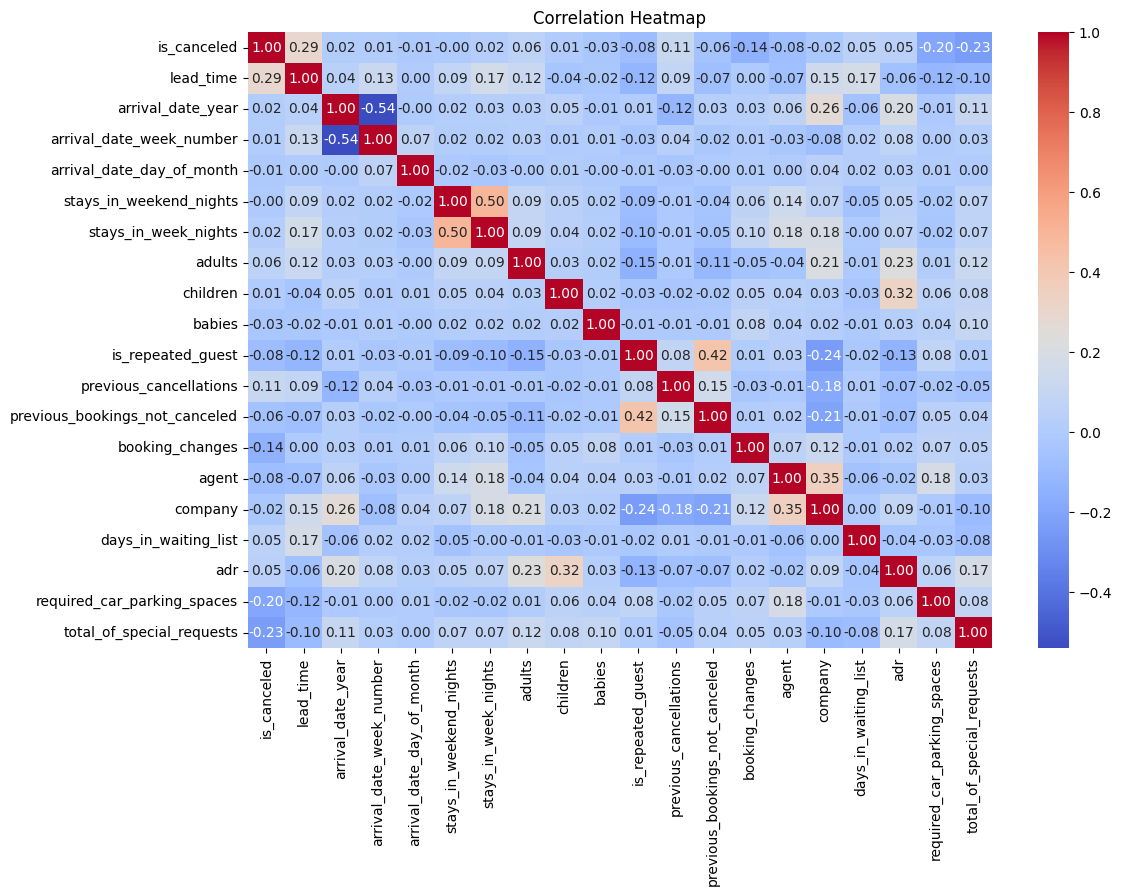

In [33]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


i used correlation matrix to see the realtion between columns in my data so from ther we can see that there is some relation between not canceled bookings and repeated guests


before detecting outliers we will convert all columns into numeric values also drop columns of company and agent

as the question is not about which is the best or worst travel companies and agents to travel with



In [34]:
#encoding months
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

In [35]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract year, month, and weekday
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['weekday'] = df['reservation_status_date'].dt.weekday

In [36]:
#encoding deposite type, assigned_room_type, customer_type, reservation_status
df['deposit_type'] = df['deposit_type'].apply(lambda x: 0 if x == 'No Deposit' else 1)

df['hotel']=df['hotel'].apply(lambda x: 0 if x == 'Resort Hotel' else 1)

meals={'BB':0,'HB':1,'SC':2}
df['meal']=df['meal'].map(meals)

le = LabelEncoder()
df['distribution_channel'] = le.fit_transform(df['distribution_channel'])

le = LabelEncoder()
df['market_segment'] = le.fit_transform(df['market_segment'])

le = LabelEncoder()
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])

df['customer_type'] = df['customer_type'].apply(lambda x: 1 if x == 'Transient' else 0)

status_map = {'Check-Out': 0, 'Canceled': 1, 'No-Show': 2}
df['reservation_status'] = df['reservation_status'].map(status_map)


In [37]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,weekday
0,0,0,342,2015,7,27,1,0,0,2,...,0,1,0.0,0,0,0,2015-07-01,2015,7,2
1,0,0,737,2015,7,27,1,0,0,2,...,0,1,0.0,0,0,0,2015-07-01,2015,7,2
2,0,0,7,2015,7,27,1,0,1,1,...,0,1,75.0,0,0,0,2015-07-02,2015,7,3
3,0,0,13,2015,7,27,1,0,1,1,...,0,1,75.0,0,0,0,2015-07-02,2015,7,3
4,0,0,14,2015,7,27,1,0,2,2,...,0,1,98.0,0,1,0,2015-07-03,2015,7,4


In [38]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  int64         
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

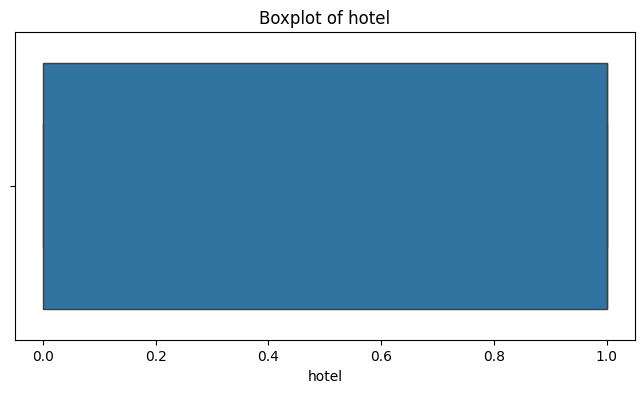

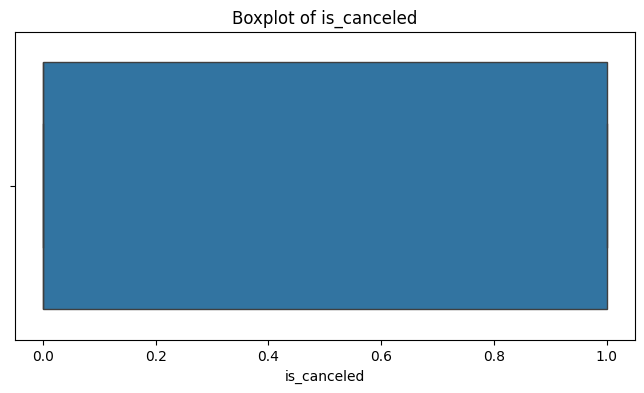

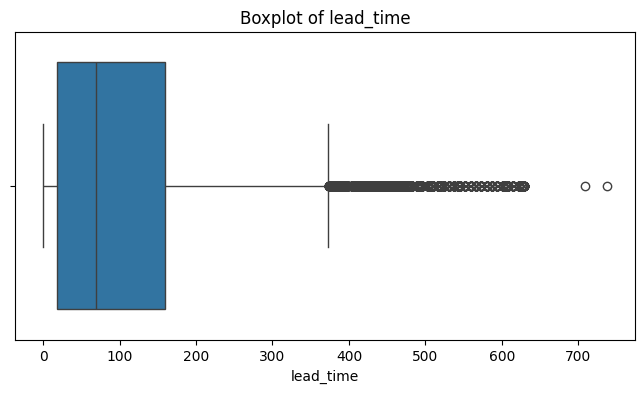

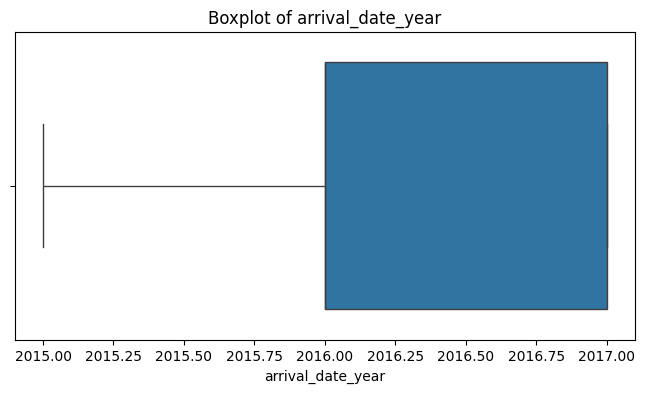

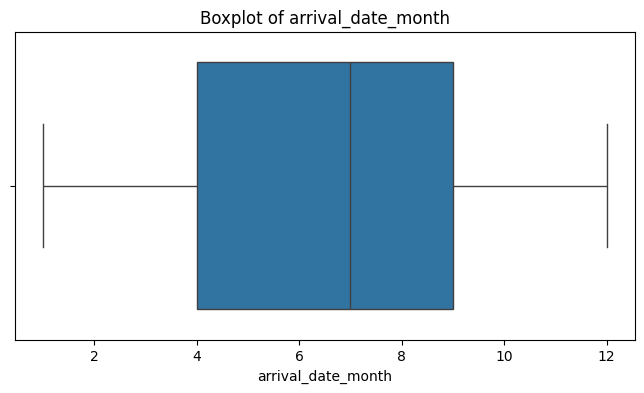

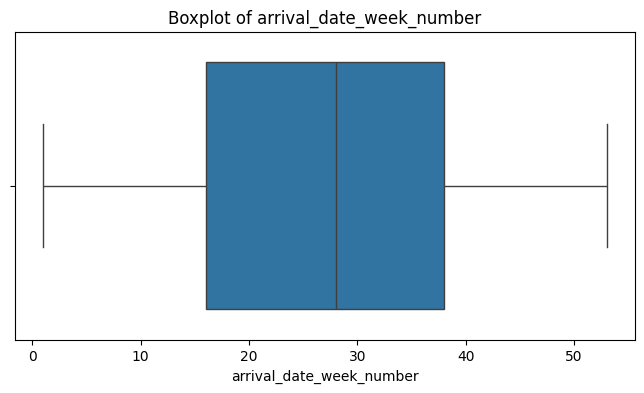

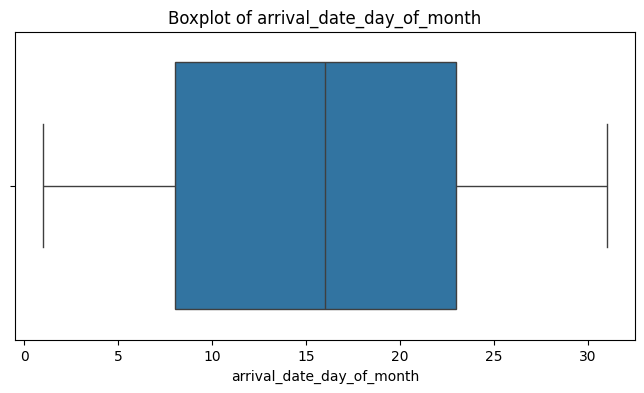

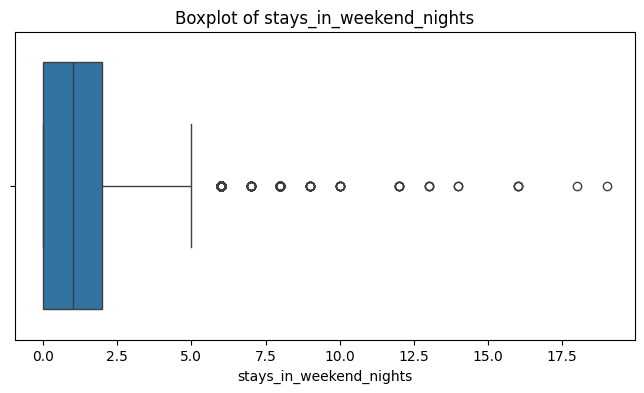

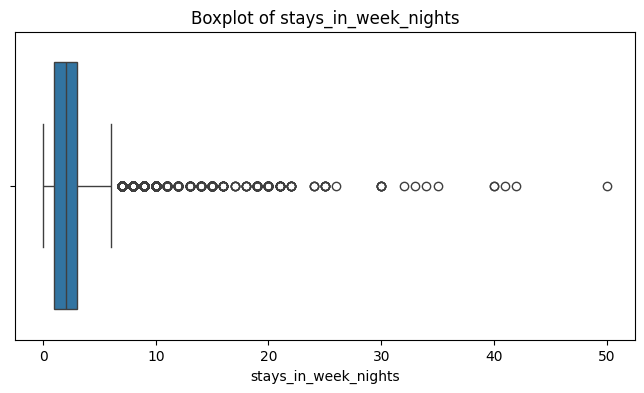

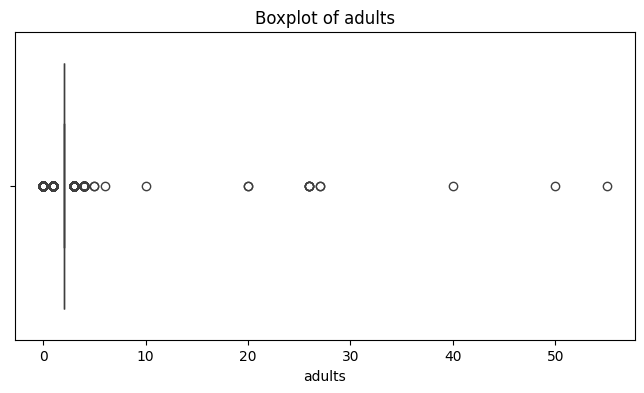

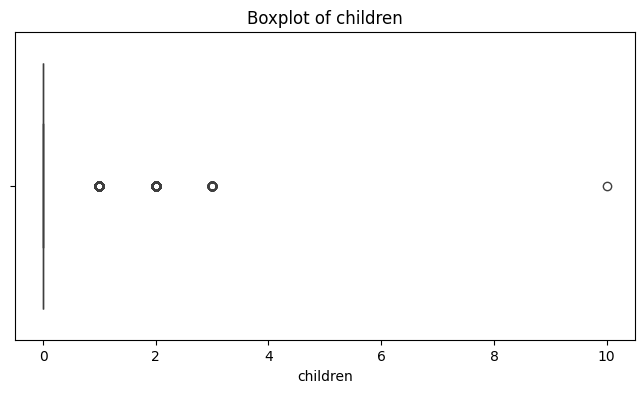

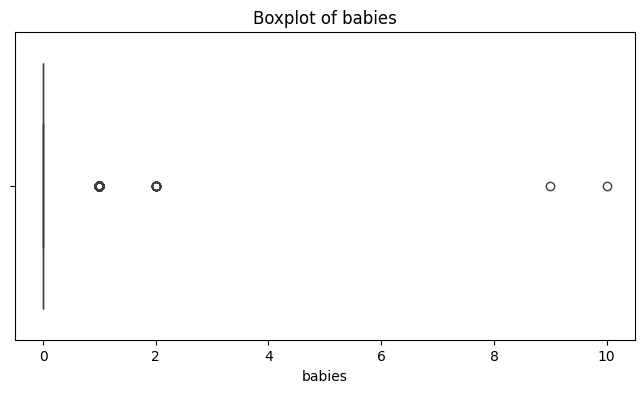

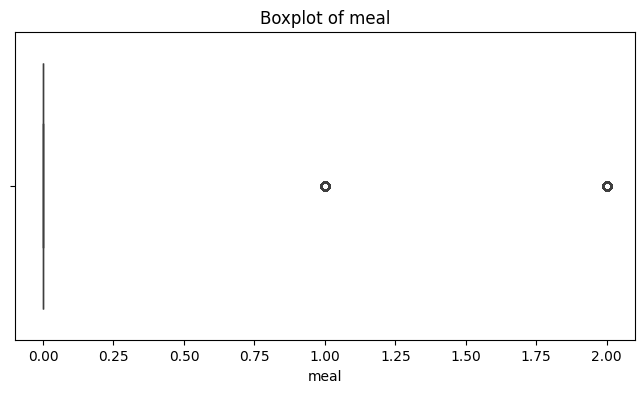

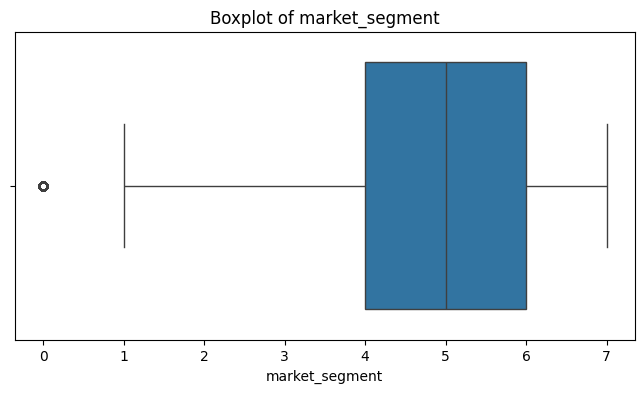

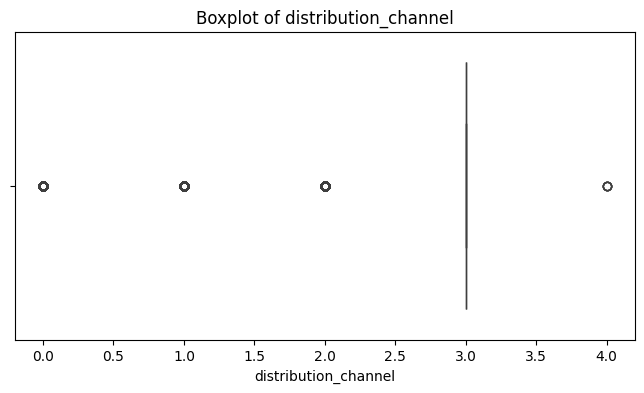

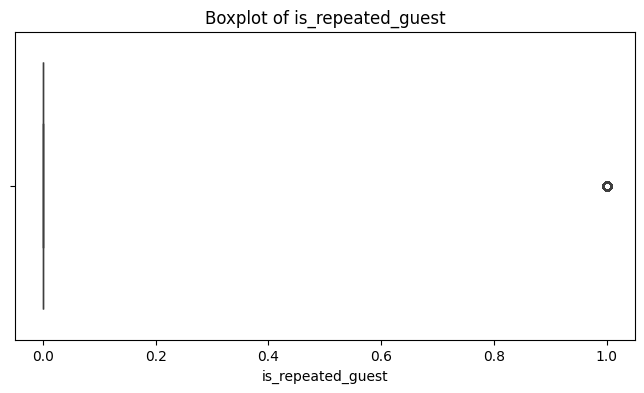

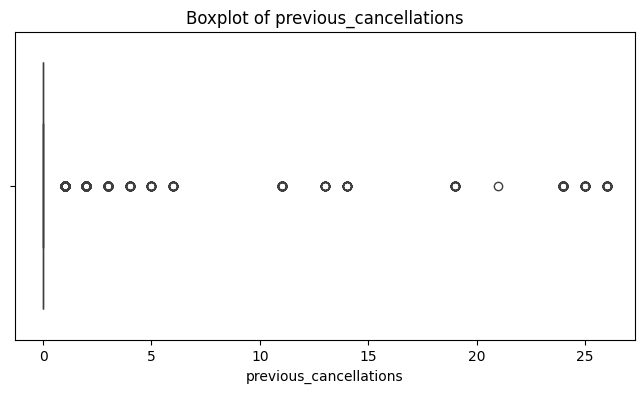

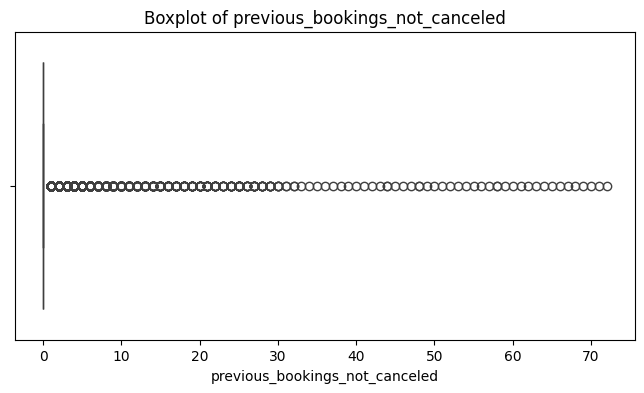

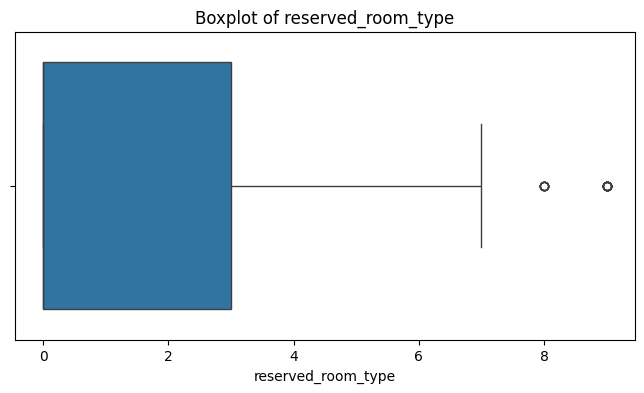

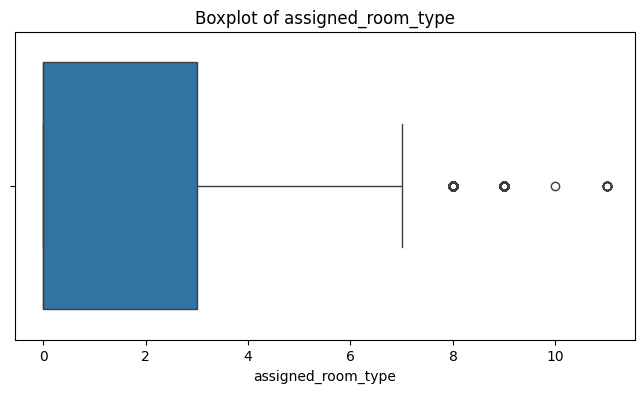

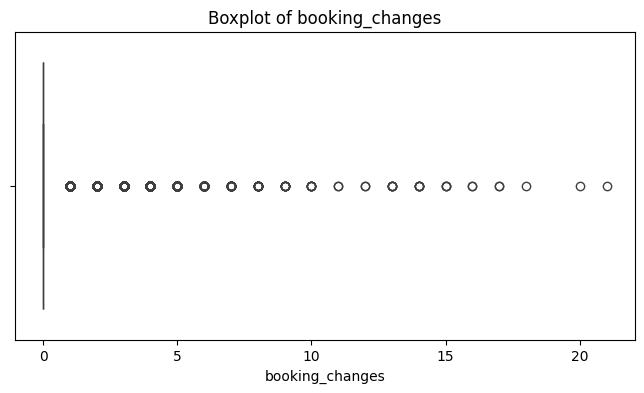

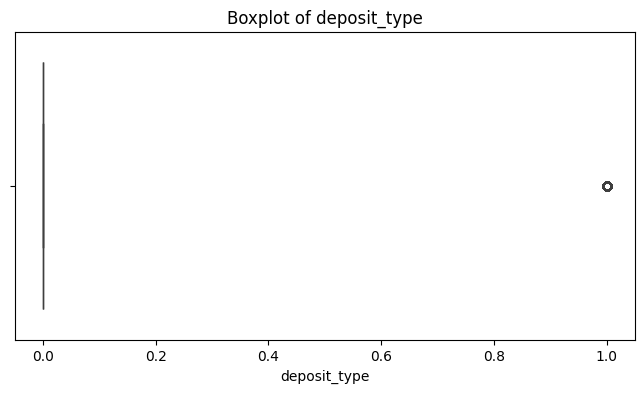

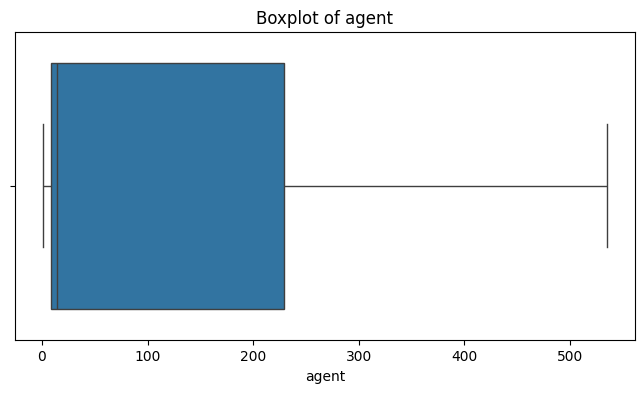

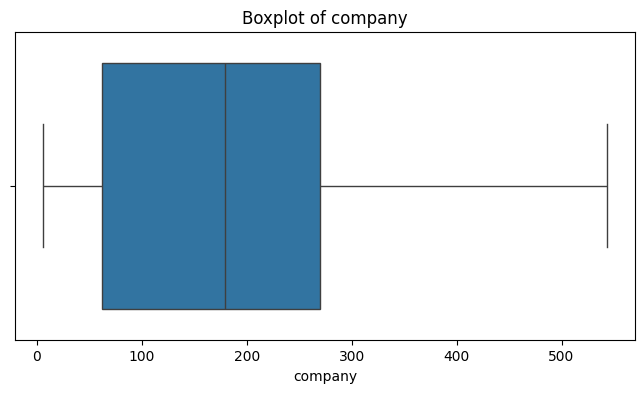

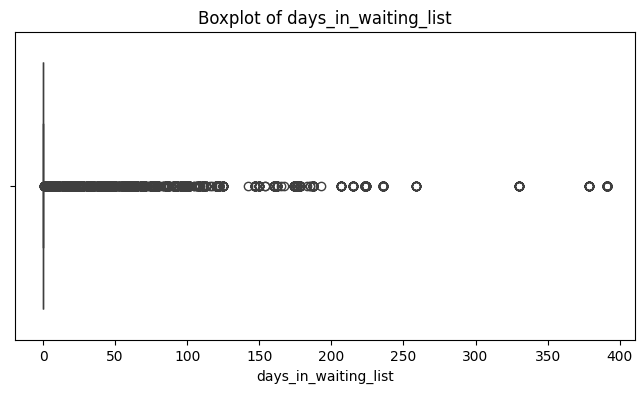

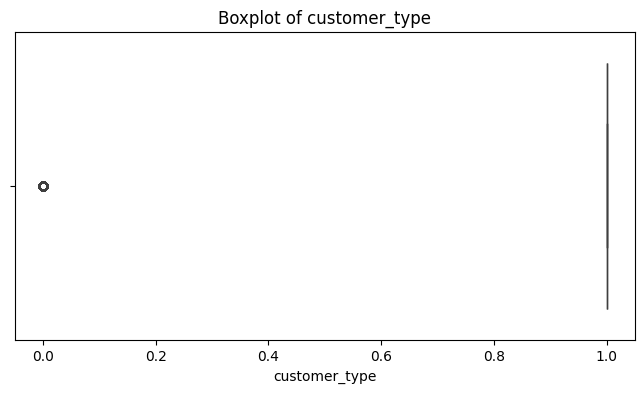

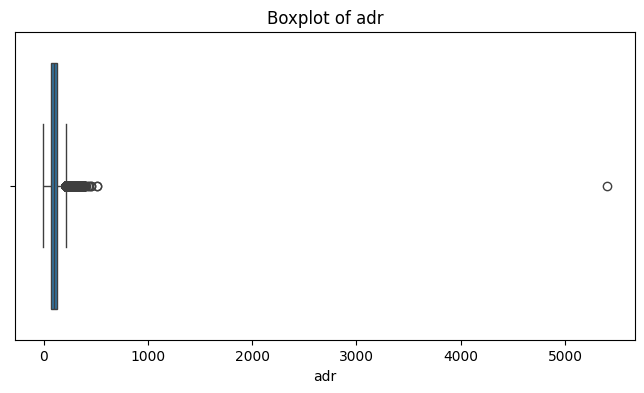

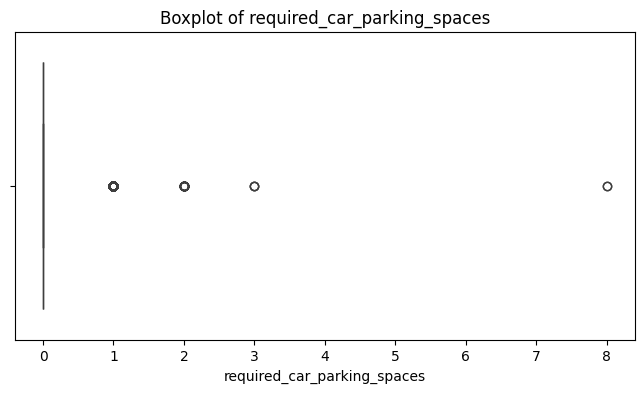

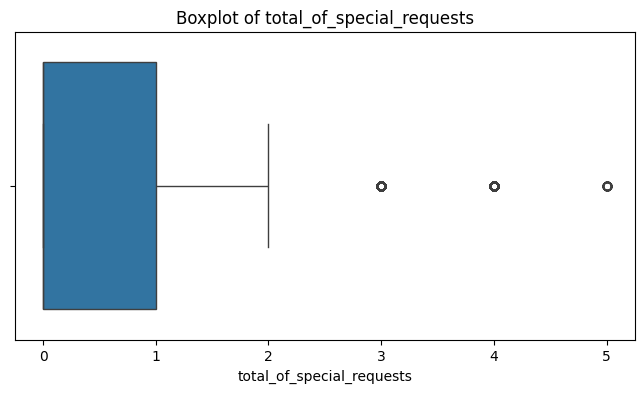

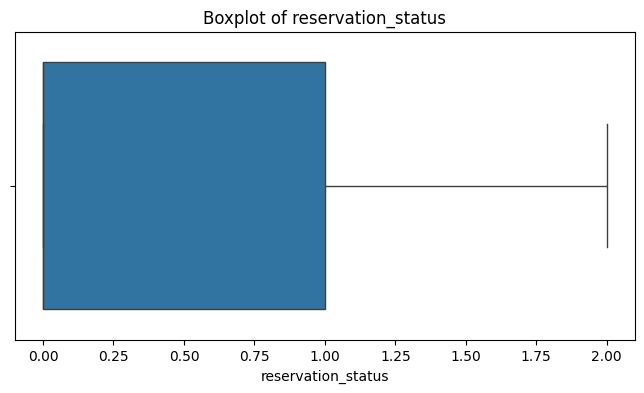

Number of outliers detected per column:
{'hotel': 0, 'is_canceled': 0, 'lead_time': 3005, 'arrival_date_year': 0, 'arrival_date_month': 0, 'arrival_date_week_number': 0, 'arrival_date_day_of_month': 0, 'stays_in_weekend_nights': 265, 'stays_in_week_nights': 3354, 'adults': 29710, 'children': 8590, 'babies': 917, 'meal': 25113, 'market_segment': 237, 'distribution_channel': 21520, 'is_repeated_guest': 3810, 'previous_cancellations': 6484, 'previous_bookings_not_canceled': 3620, 'reserved_room_type': 18, 'assigned_room_type': 655, 'booking_changes': 18076, 'deposit_type': 14749, 'agent': 0, 'company': 0, 'days_in_waiting_list': 3698, 'customer_type': 29777, 'adr': 3793, 'required_car_parking_spaces': 7416, 'total_of_special_requests': 2877, 'reservation_status': 0}


In [39]:
# Loop through all numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Detect outliers using IQR
outlier_report = {}

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_report[col] = len(outliers)

# Show how many outliers per column
print("Number of outliers detected per column:")
print(outlier_report)

High outliers: Columns such as adults (29,710), customer_type (29,777), and meal (25,113) show a very large number of outliers. This could be due to data entry issues ( unrealistic values for the number of adults/children) or categorical encodings being misinterpreted as continuous values.

Moderate outliers: Features like lead_time (3,005), adr (3,793), and booking_changes (18,076) show a notable but smaller number of outliers. , since variables like ADR (Average Daily Rate) and lead time often naturally include extreme values due to unusual booking patterns.

Low/No outliers: Several features, including hotel, is_canceled, arrival_date features, reservation_status, show zero outliers

# data cleaning

lets explore the the reset of the data


In [40]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


from here we can see a big gap in the missings in the arrival_date_month so we will drop it to since it wont affect our main features and for the other columns we will replace the missing values


In [41]:
df = df.drop(columns=['arrival_date_month','reservation_status_date'], axis=1)

for childern's columns i will replace all the nulls with 0.0 values

In [42]:
children_median = df['children'].median()
df['children'] = df['children'].fillna(children_median)

for the meal and country column i will fill it with the most frequent which is the mode of it thing in this columns after encoding it above


In [43]:
most_frequent = df['meal'].mode()[0]
df['meal'] = df['meal'].map(meals)
df['meal'] = df['meal'].fillna(most_frequent)


In [44]:

country_mode = df['country'].mode()[0]
df['country'] = df['country'].fillna(country_mode)

In [45]:
df['company'] = df['company'].fillna(0).astype(int)
df['agent'] = df['agent'].fillna(0).astype(int)


checking for duplicates after replacing the missing columns

In [46]:
# Check number of duplicate rows
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Show duplicate rows (if you want to inspect them)
duplicates = df[df.duplicated()]
print(duplicates.head())


Number of duplicate rows: 32041
     hotel  is_canceled  lead_time  arrival_date_year  \
5        0            0         14               2015   
22       0            0         72               2015   
43       0            0         70               2015   
138      0            1          5               2015   
200      0            0          0               2015   

     arrival_date_week_number  arrival_date_day_of_month  \
5                          27                          1   
22                         27                          1   
43                         27                          2   
138                        28                          5   
200                        28                          7   

     stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
5                          0                     2       2       0.0  ...   
22                         2                     4       2       0.0  ...   
43                         2     

In [47]:
duplicate_count=df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 32041


In [48]:
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Duplicate rows removed.



--- Column: lead_time ---


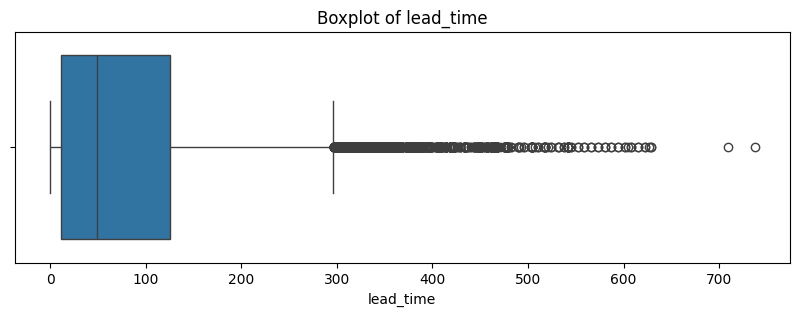

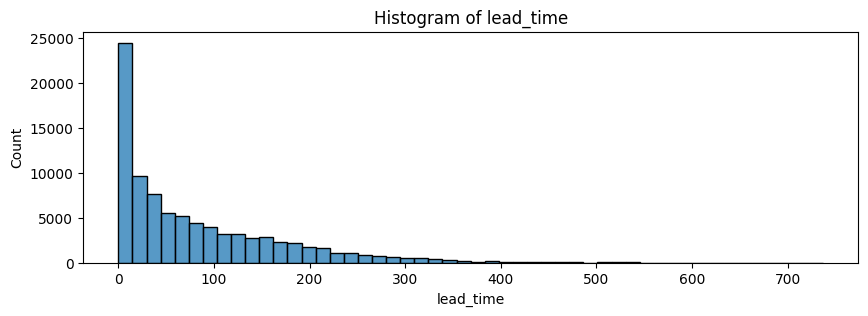

Q1=11.0, Q3=125.0, IQR=114.0
Lower fence=-160.0, Upper fence=296.0
Outliers: 2394 rows (2.74%)

--- Column: adr ---


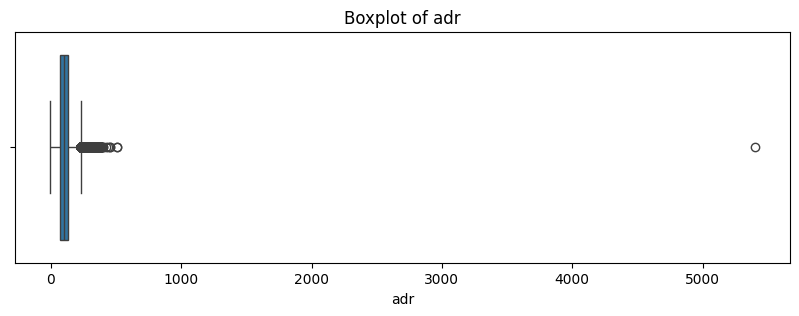

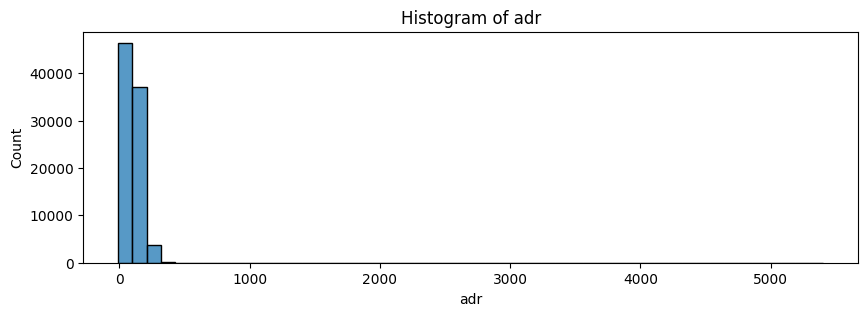

Q1=76.67, Q3=127.65, IQR=50.980000000000004
Lower fence=0.20000000000000284, Upper fence=204.12
Outliers: 999 rows (3.06%)
Examples of extreme adr values:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,weekday
48515,1,1,35,2016,13,25,0,1,2,0.0,...,0,0,1,5400.0,0,0,1,2016,2,4


Negative adr values (if any): 1

Outlier Summary:


,column,Q1,Q3,IQR,Lower fence,Upper fence,Outliers,Outlier_pct
0,hotel,0.00,1.00,1.00,-1.5,2.50,0,0.00
1,is_canceled,0.00,1.00,1.00,-1.5,2.50,0,0.00
2,lead_time,11.00,125.00,114.00,-160.0,296.00,2394,2.74
3,arrival_date_year,2016.00,2017.00,1.00,2014.5,2018.50,0,0.00
4,arrival_date_week_number,15.00,37.00,22.00,-18.0,70.00,0,0.00
5,arrival_date_day_of_month,8.00,23.00,15.00,-14.5,45.50,0,0.00
6,stays_in_weekend_nights,0.00,2.00,2.00,-3.0,5.00,212,0.25
7,stays_in_week_nights,1.00,3.00,2.00,-2.0,6.00,2633,3.11
8,adults,2.00,2.00,0.00,2.0,2.00,21786,26.53
9,children,0.00,0.00,0.00,0.0,0.00,6810,11.29


,column,dtype,non_null,missing,missing_pct,unique,top_value,sample_values
0,hotel,int64,28781,0,0.0,2,1,"[0, 1]"
1,is_canceled,int64,28781,0,0.0,2,0,"[0, 1]"
2,lead_time,int64,28781,0,0.0,297,0,"[14, 85, 75, 23, 35]"
3,arrival_date_year,int64,28781,0,0.0,3,2016,"[2015, 2016, 2017]"
4,arrival_date_week_number,int64,28781,0,0.0,53,18,"[27, 28, 29, 30, 31]"
5,arrival_date_day_of_month,int64,28781,0,0.0,31,11,"[1, 2, 3, 4, 5]"
6,stays_in_weekend_nights,int64,28781,0,0.0,5,0,"[0, 2, 1, 3, 4]"
7,stays_in_week_nights,int64,28781,0,0.0,7,2,"[2, 3, 4, 1, 5]"
8,adults,int64,28781,0,0.0,1,2,[2]
9,children,float64,28781,0,0.0,1,0.0,[0.0]


Saved data_quality_report_phase1.csv


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Detect and remove outliers
def remove_outliers_iqr(df):
    df_clean = df.copy()
    num_cols = df_clean.select_dtypes(include=['number']).columns

    outlier_summary = []

    for col in num_cols:
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask_outliers = (df_clean[col] < lower) | (df_clean[col] > upper)
        n_out = mask_outliers.sum()
        pct_out = (n_out / len(df_clean)) * 100

        # Save outlier stats
        outlier_summary.append({
            "column": col,
            "Q1": q1,
            "Q3": q3,
            "IQR": iqr,
            "Lower fence": lower,
            "Upper fence": upper,
            "Outliers": n_out,
            "Outlier_pct": round(pct_out, 2)
        })

        # Remove outliers
        df_clean = df_clean[~mask_outliers]

        # Optional: quick plots for key columns
        if col in ['adr', 'lead_time']:
            print(f"\n--- Column: {col} ---")
            plt.figure(figsize=(10,3))
            sns.boxplot(x=df[col].dropna())
            plt.title(f'Boxplot of {col}')
            plt.show()

            plt.figure(figsize=(10,3))
            sns.histplot(df[col].dropna(), bins=50)
            plt.title(f'Histogram of {col}')
            plt.show()

            print(f"Q1={q1}, Q3={q3}, IQR={iqr}")
            print(f"Lower fence={lower}, Upper fence={upper}")
            print(f"Outliers: {n_out} rows ({pct_out:.2f}%)")

            if col == 'adr':
                print("Examples of extreme adr values:")
                display(df[df['adr'] > 1000].head(5))
                print("Negative adr values (if any):", (df['adr'] < 0).sum())

    return df_clean, pd.DataFrame(outlier_summary)

# Step 2: Data quality report
def data_quality_report(df):
    rows = []
    for c in df.columns:
        s = df[c]
        dtype = str(s.dtype)
        non_null = s.count()
        missing = s.isnull().sum()
        missing_pct = (missing / len(df) * 100).round(2)
        unique = s.nunique(dropna=True)
        try:
            top = s.mode().iloc[0] if unique > 0 else None
        except:
            top = None
        samples = s.dropna().unique()[:5].tolist()
        rows.append({
            'column': c,
            'dtype': dtype,
            'non_null': non_null,
            'missing': missing,
            'missing_pct': missing_pct,
            'unique': unique,
            'top_value': top,
            'sample_values': samples
        })
    return pd.DataFrame(rows).sort_values(by='missing', ascending=False)

# Run the workflow
df_clean, outlier_stats = remove_outliers_iqr(df)

print("\nOutlier Summary:")
display(outlier_stats)

dq = data_quality_report(df_clean)
display(dq)
dq.to_csv('data_quality_report_phase1.csv', index=False)
print("Saved data_quality_report_phase1.csv")


In [56]:
# total_guests = adults + children + babies
df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies']

# total_nights = stays_in_weekend_nights + stays_in_week_nights
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# is_family
df['is_family'] = np.where((df['children'] + df['babies']) > 0, 1, 0)

In [58]:
leak_cols = ['reservation_status', 'reservation_status_date']
for col in leak_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

In [60]:
# a) One-Hot Encoding

low_card_cols = ['meal', 'market_segment', 'distribution_channel', 'deposit_type']
for col in low_card_cols:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], prefix=[col], drop_first=True)

# b) High-cardinality → frequency encoding

if 'country' in df.columns:
    freq = df['country'].value_counts() / len(df)

    rare_countries = freq[freq < 0.01].index
    df['country'] = df['country'].replace(rare_countries, 'Other')

    # frequency encoding

    country_freq = df['country'].value_counts() / len(df)
    df['country_freq'] = df['country'].map(country_freq)
    df.drop('country', axis=1, inplace=True)

In [61]:
print(df.dtypes.value_counts())
print("Shape after feature engineering:", df.shape)

int64      24
bool       12
float64     4
int32       3
Name: count, dtype: int64
Shape after feature engineering: (87349, 43)


In [62]:
from sklearn.model_selection import train_test_split


target_col = 'is_canceled'
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (69879, 42)
Test shape: (17470, 42)
